# **Understanding & Importing Dataset**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/water_potability.csv")

In [3]:
df.shape

(3276, 10)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


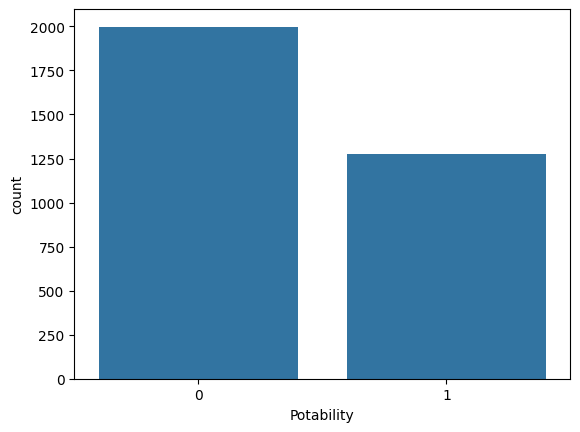

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x = df["Potability"])
plt.show()

### 🧹 **Data Transformation & Cleaning** 🧹

In [11]:
df.fillna(df.mean(),inplace=True)

# **Normalization**

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505771,0.104997,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581699,0.102669,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532673,0.127938,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000
Potability,0.000000,0.390110,0.487849,1.000000


##  👨🏻‍💻 Data Preprocessing 👨🏻‍💻
# **Outliers Detection**

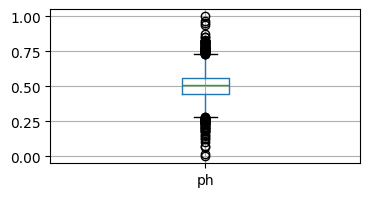

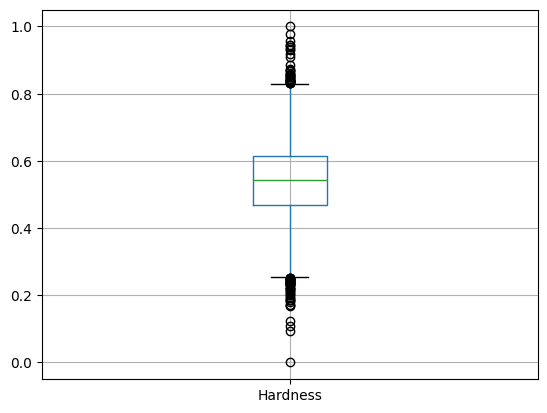

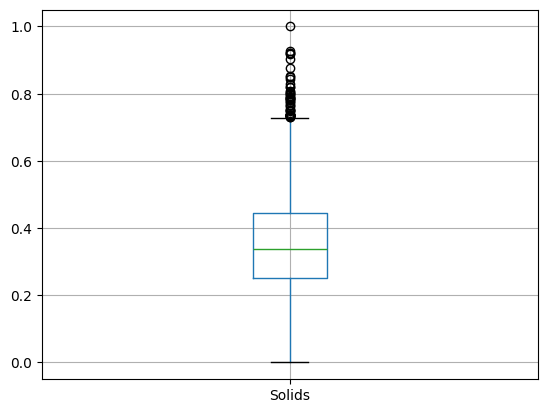

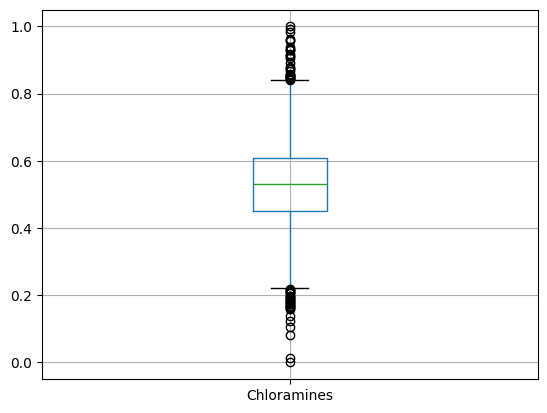

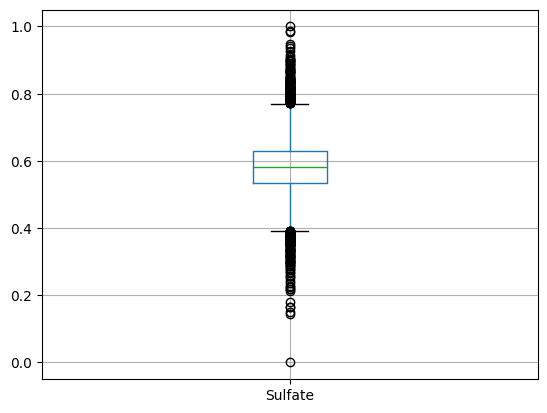

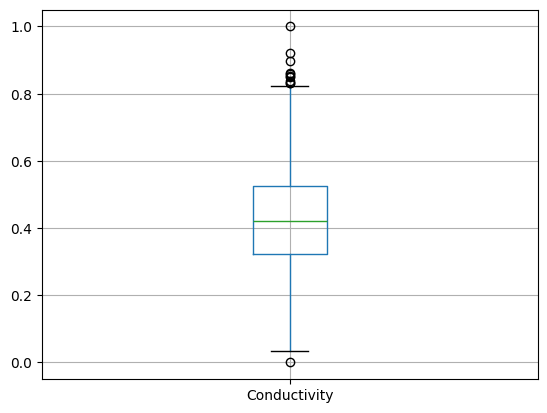

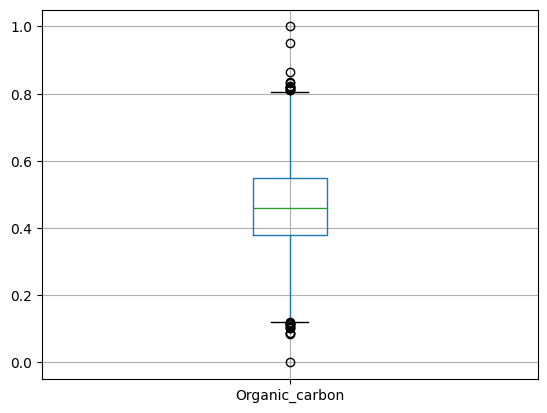

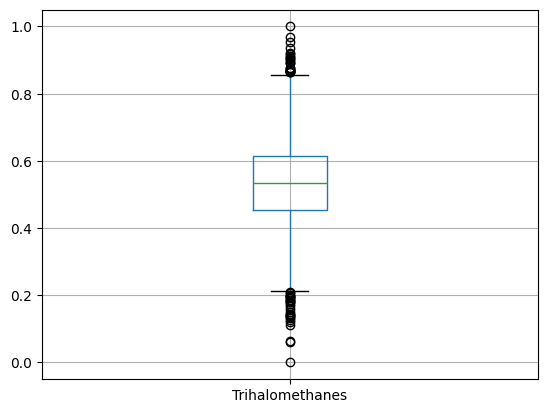

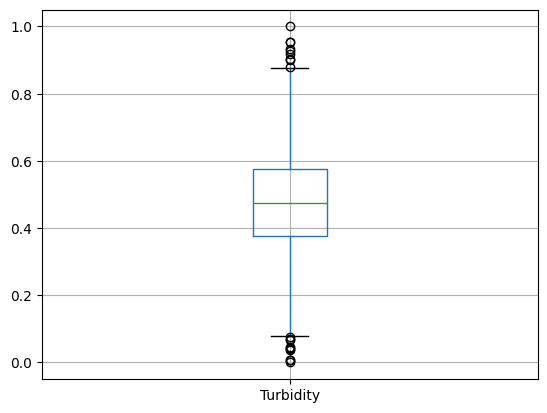

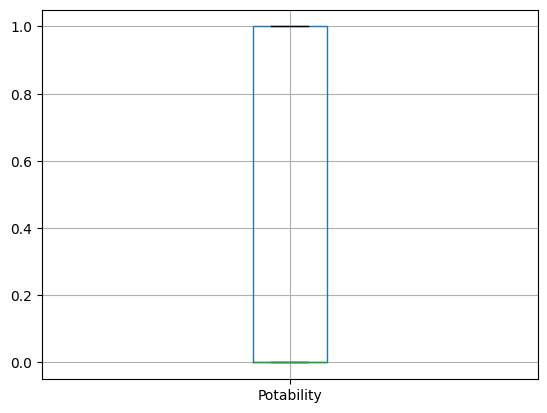

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 2))
for col in df.columns:
    df[[col]].boxplot()
    plt.show()

# **Exploratory Data Analysis**

# Feature Distribution

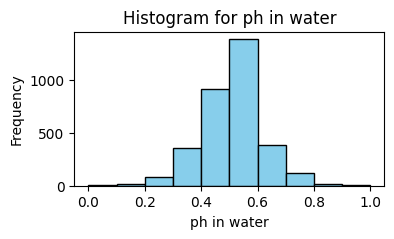

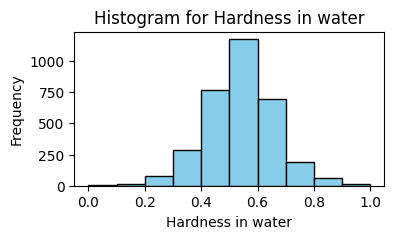

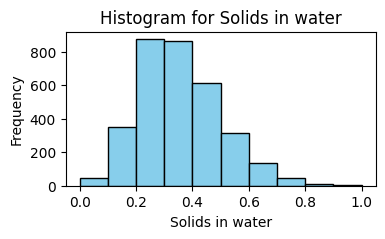

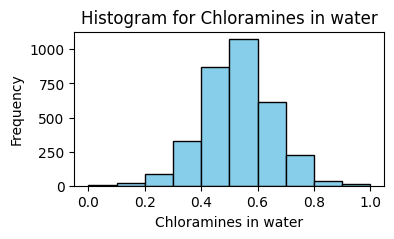

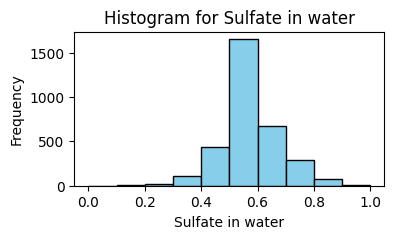

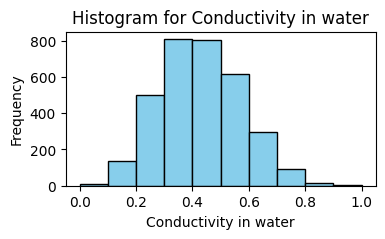

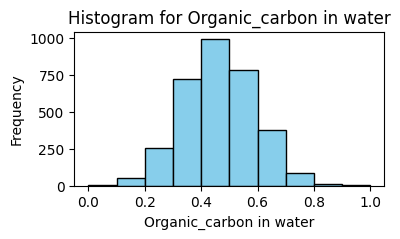

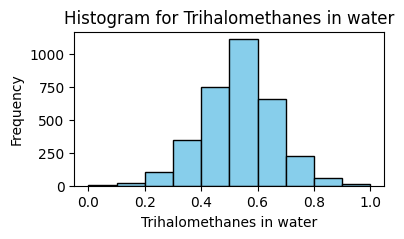

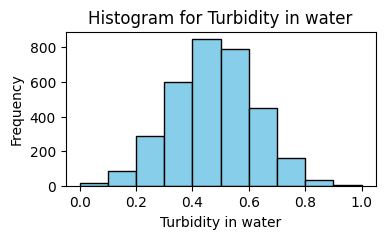

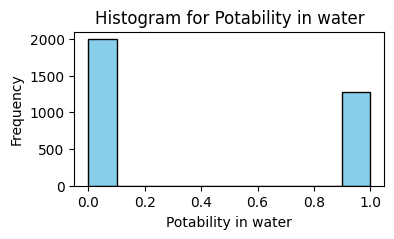

In [15]:
for col in df:
    plt.figure(figsize=(4,2))
    plt.hist(df[col], color='skyblue', edgecolor='black')
    plt.xlabel(f"{col} in water")
    plt.ylabel('Frequency')
    plt.title(f"Histogram for {col} in water")
    plt.show()

In [16]:
#Removing Outliers
X = df.drop('Potability', axis=1)
y = df['Potability']

## Feature Engineering

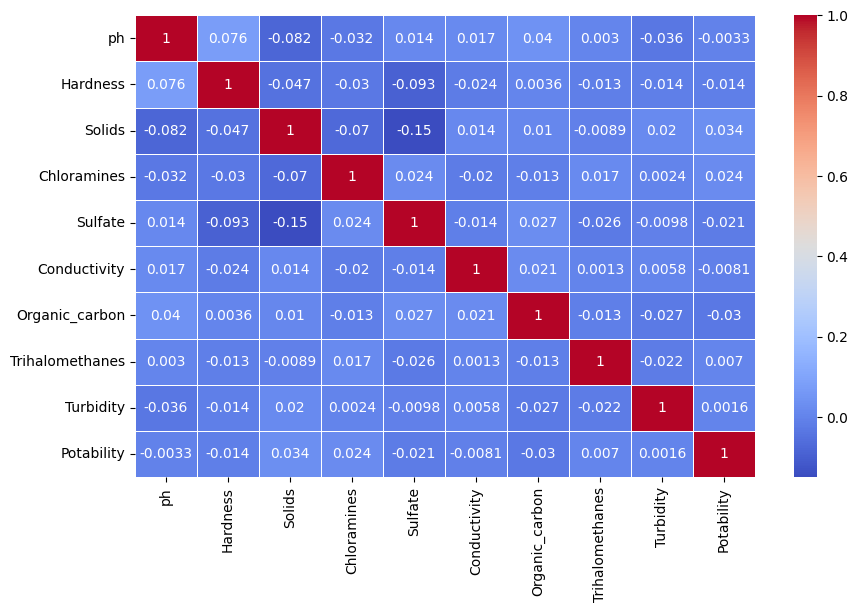

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5);

In [18]:
#Creating new features for enhancing our model
#Nature of Water
def categorize_ph(ph):
    if ph < 6.5:
        return "acidic"
    elif ph > 8.5:
        return "alkaline"
    else:
        return "neutral"

# **Model Selection & Training**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

# **SupportVector**

In [22]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0.

# **RandomForest**

In [23]:
rf = RandomForestClassifier(n_estimators = 250)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# **KNN**

In [24]:
kn = KNeighborsClassifier(n_neighbors = 6)
kn.fit(X_train,y_train)
kn_pred = kn.predict(X_test)
print(kn_pred)

[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.

# **DecisionTree**

In [25]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
dc_pred = dc.predict(X_test)
dc_pred

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

# **Extreme Gradient Boosting**

In [26]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

# **Hyperparameter Tuning**

In [27]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
xtr_scaled = RobustScaler().fit_transform(X_train)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

grid = GridSearchCV(rf , param_grid = param_grid, cv = 5)

grid.fit(xtr_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

# **Model Evaluation**

Accuracy score:  0.6859756097560976
-----------------------------------
Confusion Matrix:
 [[364 158]
 [ 48  86]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78       522
         1.0       0.35      0.64      0.46       134

    accuracy                           0.69       656
   macro avg       0.62      0.67      0.62       656
weighted avg       0.78      0.69      0.71       656



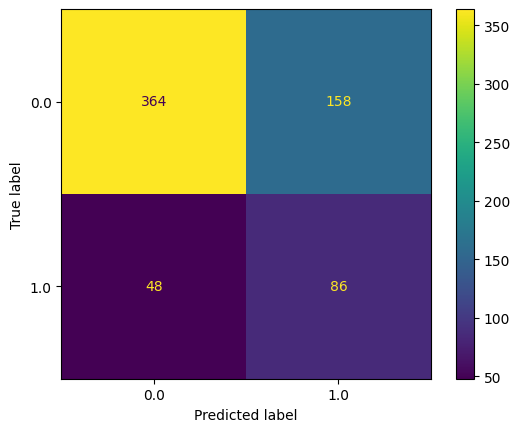

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(rf_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(rf_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(rf_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(rf_pred, y_test)
plt.show()

Accuracy score:  0.6966463414634146
-----------------------------------
Confusion Matrix:
 [[389 176]
 [ 23  68]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.69      0.80       565
         1.0       0.28      0.75      0.41        91

    accuracy                           0.70       656
   macro avg       0.61      0.72      0.60       656
weighted avg       0.85      0.70      0.74       656



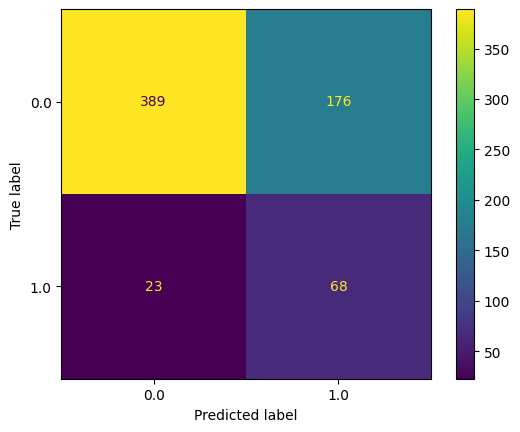

In [29]:
print('Accuracy score: ', accuracy_score(svc_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(svc_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(svc_pred,y_test))
ConfusionMatrixDisplay.from_predictions(svc_pred, y_test)
plt.show()

Accuracy score:  0.6448170731707317
-----------------------------------
Confusion Matrix:
 [[364 185]
 [ 48  59]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.66      0.76       549
         1.0       0.24      0.55      0.34       107

    accuracy                           0.64       656
   macro avg       0.56      0.61      0.55       656
weighted avg       0.78      0.64      0.69       656



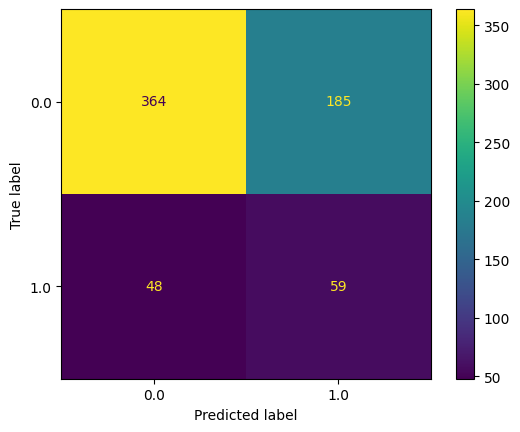

In [39]:
print('Accuracy score: ', accuracy_score(kn_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(kn_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(kn_pred,y_test))
ConfusionMatrixDisplay.from_predictions(kn_pred, y_test)
plt.show()

Accuracy score:  0.5838414634146342
-----------------------------------
Confusion Matrix:
 [[259 120]
 [153 124]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.68      0.65       379
         1.0       0.51      0.45      0.48       277

    accuracy                           0.58       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.58      0.58      0.58       656



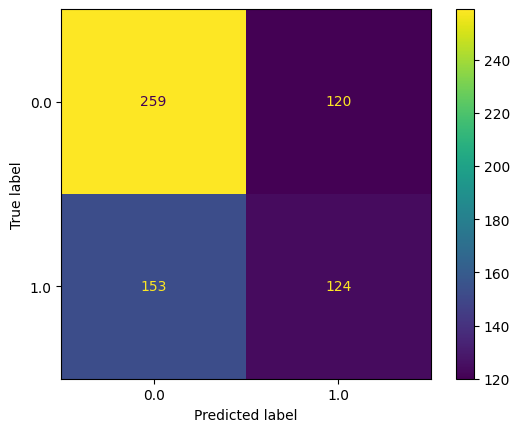

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy score: ', accuracy_score(dc_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(dc_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(dc_pred,y_test))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(dc_pred, y_test)
plt.show()

Accuracy score:  0.6570121951219512
-----------------------------------
Confusion Matrix:
 [[325 138]
 [ 87 106]]
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       463
           1       0.43      0.55      0.49       193

    accuracy                           0.66       656
   macro avg       0.61      0.63      0.61       656
weighted avg       0.68      0.66      0.67       656



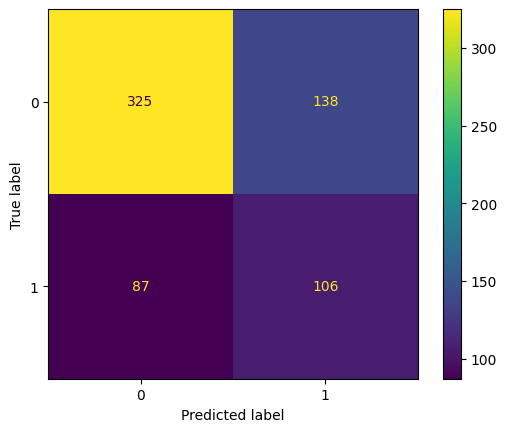

In [32]:
print('Accuracy score: ', accuracy_score(xgb_pred,y_test))
print('-'*35)
print('Confusion Matrix:\n',confusion_matrix(xgb_pred,y_test))
print('-'*35)
print('Classification Report:\n',classification_report(xgb_pred,y_test))
ConfusionMatrixDisplay.from_predictions(xgb_pred, y_test)
plt.show()

In [36]:
print('Accuracy score of Random Forest: ','-'*11, accuracy_score(rf_pred,y_test))
print('Accuracy score of KNN: ','-'*21, accuracy_score(kn_pred,y_test))
print('Accuracy score of DT: ','-'*21, accuracy_score(dc_pred,y_test))
print('Accuracy score of SVC(rbf): ','-'*16, accuracy_score(svc_pred,y_test))
print('Accuracy score of XGB: ','-'*21, accuracy_score(xgb_pred,y_test))

Accuracy score of Random Forest:  ----------- 0.6859756097560976
Accuracy score of KNN:  --------------------- 0.6448170731707317
Accuracy score of DT:  --------------------- 0.5838414634146342
Accuracy score of SVC(rbf):  ---------------- 0.6966463414634146
Accuracy score of XGB:  --------------------- 0.6570121951219512


From the above findings we get **Support Vector Classifier** as best model with **0.69** accuracy score

This dataset is valuable for water quality assessment, water treatment planning, and ensuring the safety of drinking water supplies. It can be utilized by water treatment plants, environmental agencies, and researchers to make data-driven decisions regarding water quality and potability